## import libs

In [1]:
import numpy as np
import os.path
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from ipywidgets import IntProgress
from os import path
from tqdm import tqdm
from random import randrange
from sklearn.metrics import accuracy_score

## Loading and processing data

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ]) # преобразование изображений в тензор и уменьшение значений до [0;1]

In [3]:
if not path.exists('dataset_mnist'):
    dataset = datasets.MNIST('dataset_mnist', download=True, train=True, transform=transform)
    #val_data = datasets.MNIST('dataset_mnist', download=True, train=False, transform=transform)
else:
    dataset = datasets.MNIST('dataset_mnist', download=False, train=True, transform=transform)
    
train_data, val_data, test_data = torch.utils.data.random_split(dataset, [50000, 2000, 8000])

train_data = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_data = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=True)
test_data = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

## Check data

In [4]:
dataiter = iter(train_data)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


[0, 2, 8, 3, 9, 7, 7, 7, 6, 8, 6, 0, 0, 3, 7, 5, 3, 6, 4, 8, 4, 2, 2, 1, 2, 3, 2, 7, 8, 4, 3, 8, 5, 8, 6, 8, 0, 8, 6, 7, 3, 2, 3, 9, 8, 1, 0, 9, 8, 8, 7, 4, 9, 4, 3, 6, 7, 7, 6, 7, 1, 4, 5, 0]


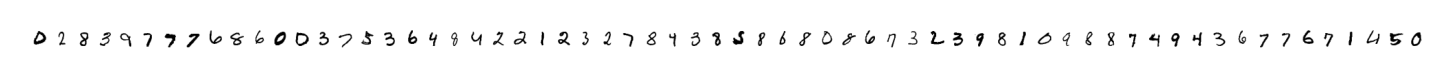

In [5]:
plt.rcParams['figure.dpi'] = 300
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(1, 64, index + 1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
print(labels.tolist())

## Multilayer neural network 

In [6]:
input_dimension = 28*28
hidden_dimension = [128, 64]
output_dimension = 10

class NumberRecognizer(nn.Module):
    def __init__(self, input_dim, hidden_dim_in, hidden_dim_out, out_dim):
        super(NumberRecognizer, self).__init__()
        self.fc1 = nn.Linear(input_dimension, hidden_dim_in)
        self.fc2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_dim_in, hidden_dim_out)
        self.fc4 = nn.ReLU()
        self.fc5 = nn.Linear(hidden_dim_out, output_dimension)
        self.fc6 = nn.LogSoftmax(dim=1)
        
    def forward(self, x_in):
        x1 = self.fc2(self.fc1(x_in))
        x2 = self.fc4(self.fc3(x1))
        logits = self.fc6(self.fc5(x2))
        return logits

## Training

In [7]:
learning_rate = 1e-4
epochs = 10

numberRecognizer = NumberRecognizer(input_dimension, hidden_dimension[0], hidden_dimension[1], output_dimension)
loss_fn = nn.NLLLoss()
optimizer = optim.Adam(numberRecognizer.parameters(), lr=learning_rate)

In [8]:
start_time= time()
for epoch in range(epochs):
    numberRecognizer.train()
    running_loss = 0
    for images, labels in tqdm(train_data):
        images = images.view(images.shape[0], -1) # преобразование в вектор [784]
        optimizer.zero_grad()
        logits = numberRecognizer(images)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    numberRecognizer.eval()
    correct_preds_count, all_preds_count = 0, 0
    for images, labels in tqdm(val_data):
        for i in range(len(labels)):
            image = images[i].view(1, 784)
            logit = numberRecognizer(image)
            prob = torch.exp(logit)
            prob = list(prob.detach().numpy()[0])
            pred_label = prob.index(max(prob))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_preds_count += 1
            all_preds_count += 1
    print(f'Epoch:{epoch + 1}\nTraining loss:{running_loss/len(train_data)}\nAccuracy score:{correct_preds_count/all_preds_count}')
print(f'Training Time:{round((time() - start_time) / 60, 2)}m')

  3%|██                                                                               | 20/782 [00:00<00:07, 96.19it/s]

Epoch:1
Training loss:0.8463369472633542
Accuracy score:0.8815


  1%|█                                                                                | 10/782 [00:00<00:07, 99.98it/s]

Epoch:2
Training loss:0.36008474353672293
Accuracy score:0.9025


  1%|█                                                                                | 10/782 [00:00<00:07, 99.98it/s]

Epoch:3
Training loss:0.3053659572911537
Accuracy score:0.9145


  1%|█                                                                                | 10/782 [00:00<00:08, 96.13it/s]

Epoch:4
Training loss:0.2742783322101435
Accuracy score:0.9225


  3%|██                                                                               | 20/782 [00:00<00:07, 95.97it/s]

Epoch:5
Training loss:0.2510897132098827
Accuracy score:0.921


  1%|█▏                                                                              | 11/782 [00:00<00:07, 100.89it/s]

Epoch:6
Training loss:0.2318597482160077
Accuracy score:0.9295


  1%|█                                                                                | 10/782 [00:00<00:07, 97.07it/s]

Epoch:7
Training loss:0.2134867220869302
Accuracy score:0.932


  1%|█                                                                                | 10/782 [00:00<00:08, 92.57it/s]

Epoch:8
Training loss:0.19861306795550276
Accuracy score:0.9345


  1%|█                                                                                | 10/782 [00:00<00:08, 95.22it/s]

Epoch:9
Training loss:0.18446285977407031
Accuracy score:0.9345


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 56.52it/s]

Epoch:10
Training loss:0.17198195697172827
Accuracy score:0.9385
Training Time:1.47m


## Save model

In [9]:
torch.save(numberRecognizer.state_dict(), 'models/NumberRecognizer_params.pth')

## Load model

In [10]:
numberRecognizer.load_state_dict(torch.load('models/NumberRecognizer_params.pth'))

<All keys matched successfully>

## Test

In [41]:
dataiter = iter(test_data)
images, labels = dataiter.next()

In [42]:
pred_labels = []
mistakes_count = 0
for i in range(len(labels)):
    image = images[i].view(1, 784)
    with torch.no_grad():  
        logit = numberRecognizer(image)
    prob = torch.exp(logit)
    prob = list(prob.detach().numpy()[0])
    pred_label = prob.index(max(prob))
    true_label = labels.numpy()[i]
    if pred_label != true_label:
        mistakes_count += 1
    pred_labels.append(pred_label)

Correct labels:[9, 5, 9, 5, 0, 7, 1, 6, 8, 7, 7, 0, 1, 6, 0, 0, 5, 2, 7, 0, 7, 3, 2, 4, 9, 3, 8, 7, 2, 3, 1, 9, 3, 7, 3, 0, 1, 8, 4, 5, 6, 1, 9, 9, 0, 1, 7, 7, 9, 2, 7, 3, 3, 1, 1, 3, 2, 2, 8, 2, 6, 4, 4, 1]
Pred labels:   [9, 5, 9, 5, 0, 7, 1, 2, 8, 7, 7, 0, 1, 6, 0, 0, 5, 2, 7, 0, 7, 3, 2, 4, 9, 3, 8, 7, 2, 3, 1, 9, 3, 7, 3, 0, 1, 8, 4, 5, 5, 1, 9, 9, 0, 1, 7, 7, 9, 2, 9, 3, 3, 1, 1, 3, 2, 2, 8, 2, 6, 4, 4, 1]
Number of mistakes:3


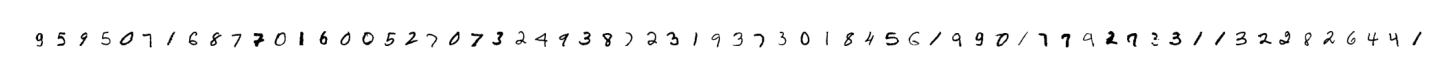

In [43]:
plt.rcParams['figure.dpi'] = 300
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(1, 64, index + 1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
print(f'Correct labels:{labels.tolist()}\nPred labels:   {pred_labels}\nNumber of mistakes:{mistakes_count}')

## Single layer neural network 

In [14]:
input_dimension = 28*28
output_dimension = 10

class LinearClassifier(nn.Module):
    def __init__(self, in_dim, out_dim):
        super(LinearClassifier, self).__init__()
        self.fc1 = nn.Linear(in_dim, out_dim)
        
    def forward(self, x_in):
        return torch.tanh(self.fc1(x_in))

## Training

In [15]:
learning_rate = 1e-3
epochs = 10

linearClassifier = LinearClassifier(input_dimension, output_dimension)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(linearClassifier.parameters(), lr=learning_rate)

In [16]:
start_time= time()
for epoch in range(epochs):
    linearClassifier.train()
    running_loss = 0
    for images, labels in tqdm(train_data):
        images = images.view(images.shape[0], -1) # преобразование в вектор [784]
        optimizer.zero_grad()
        logits = linearClassifier(images)
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    linearClassifier.eval()
    correct_preds_count, all_preds_count = 0, 0
    for images, labels in tqdm(val_data):
        for i in range(len(labels)):
            image = images[i].view(1, 784)
            logit = linearClassifier(image)
            prob = torch.exp(logit)
            prob = list(prob.detach().numpy()[0])
            pred_label = prob.index(max(prob))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_preds_count += 1
            all_preds_count += 1
    print(f'Epoch:{epoch + 1}\nTraining loss:{running_loss/len(train_data)}\nAccuracy score:{correct_preds_count/all_preds_count}')
print(f'Training Time:{round((time() - start_time) / 60, 2)}m')

  1%|█▏                                                                              | 11/782 [00:00<00:07, 108.89it/s]

Epoch:1
Training loss:1.1335964615235243
Accuracy score:0.885


  3%|██▎                                                                             | 23/782 [00:00<00:06, 112.74it/s]

Epoch:2
Training loss:1.0287651360949592
Accuracy score:0.899


  2%|█▏                                                                              | 12/782 [00:00<00:06, 111.09it/s]

Epoch:3
Training loss:1.0118023082423393
Accuracy score:0.8985


  1%|█▏                                                                              | 11/782 [00:00<00:07, 108.89it/s]

Epoch:4
Training loss:1.002058017589247
Accuracy score:0.899


  2%|█▏                                                                              | 12/782 [00:00<00:06, 112.12it/s]

Epoch:5
Training loss:0.9957740332007103
Accuracy score:0.8955


  3%|██▎                                                                             | 23/782 [00:00<00:06, 113.19it/s]

Epoch:6
Training loss:0.9911021869963087
Accuracy score:0.902


  2%|█▏                                                                              | 12/782 [00:00<00:06, 111.09it/s]

Epoch:7
Training loss:0.9880477322641846
Accuracy score:0.9035


  1%|█▏                                                                              | 11/782 [00:00<00:07, 109.97it/s]

Epoch:8
Training loss:0.9846086374786504
Accuracy score:0.906


  2%|█▏                                                                              | 12/782 [00:00<00:06, 113.18it/s]

Epoch:9
Training loss:0.9814334589502086
Accuracy score:0.908


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 83.53it/s]

Epoch:10
Training loss:0.9792791891585836
Accuracy score:0.9075
Training Time:1.26m


## Convolutional neural network

In [17]:
class ConvNumberRecognizer(nn.Module):
    def __init__(self):
        super(ConvNumberRecognizer, self).__init__()
        self.conv2d1 = nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1)
        self.batchnorm2d1 = nn.BatchNorm2d(4)
        self.relu1 = nn.ReLU(inplace=True)
        self.maxpool2d1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2d2 = nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1)
        self.batchnorm2d2 = nn.BatchNorm2d(4)
        self.relu2 = nn.ReLU(inplace=True)
        self.maxpool2d2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear = nn.Linear(7 * 7 * 4, 10)
        
    def forward(self, x_in):
        x = self.relu1(self.batchnorm2d1(self.conv2d1(x_in)))
        x = self.maxpool2d1(x)
        x = self.relu2(self.batchnorm2d2(self.conv2d2(x)))
        x = self.maxpool2d2(x)
        x = x.view(x.size(0), -1)
        logits = self.linear(x)
        return logits

## Training

In [18]:
learning_rate = 1e-3
epochs = 10

convNumberRecognizer = ConvNumberRecognizer()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(convNumberRecognizer.parameters(), lr=learning_rate)

In [19]:
start_time = time()
for epoch in range(epochs):
    convNumberRecognizer.train()
    running_loss = 0
    for images, labels in tqdm(train_data):
        optimizer.zero_grad()
        images, labels = torch.autograd.Variable(images), torch.autograd.Variable(labels)
        logits = convNumberRecognizer(images)
        loss = loss_fn(logits, labels)
        loss.backward(retain_graph=True)
        optimizer.step()
        running_loss += loss.item()
    convNumberRecognizer.eval()
    acc_score = 0
    all_preds_count = 0
    for images, labels in tqdm(val_data):
        preds = convNumberRecognizer(images)
        preds = torch.exp(preds)
        preds = list(preds.detach().numpy())
        preds = np.argmax(preds, axis=1)
        acc_score += accuracy_score(labels, preds)
        all_preds_count += 1
    print(f'Epoch:{epoch + 1}\nTraining loss:{running_loss/len(train_data)}\nAccuracy score:{acc_score / all_preds_count}')
print(f'Training Time:{round((time() - start_time) / 60, 2)}m')

  1%|▋                                                                                 | 7/782 [00:00<00:11, 68.61it/s]

Epoch:1
Training loss:0.37987256187307256
Accuracy score:0.94970703125


  1%|▋                                                                                 | 7/782 [00:00<00:11, 67.29it/s]

Epoch:2
Training loss:0.12002047726793973
Accuracy score:0.95849609375


  1%|▋                                                                                 | 7/782 [00:00<00:12, 62.49it/s]

Epoch:3
Training loss:0.09480389632532359
Accuracy score:0.96142578125


  1%|▋                                                                                 | 6/782 [00:00<00:14, 55.03it/s]

Epoch:4
Training loss:0.08396340719521846
Accuracy score:0.966796875


  1%|▋                                                                                 | 7/782 [00:00<00:12, 61.39it/s]

Epoch:5
Training loss:0.07671403745725236
Accuracy score:0.97265625


  1%|▋                                                                                 | 7/782 [00:00<00:11, 64.80it/s]

Epoch:6
Training loss:0.07099102848195149
Accuracy score:0.96630859375


  1%|▋                                                                                 | 6/782 [00:00<00:13, 57.68it/s]

Epoch:7
Training loss:0.06720877340708947
Accuracy score:0.97314453125


  1%|▋                                                                                 | 7/782 [00:00<00:11, 64.80it/s]

Epoch:8
Training loss:0.06390062771657781
Accuracy score:0.9736328125


  1%|▋                                                                                 | 6/782 [00:00<00:13, 59.39it/s]

Epoch:9
Training loss:0.061549596880298214
Accuracy score:0.9736328125


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 89.87it/s]

Epoch:10
Training loss:0.059040300925012175
Accuracy score:0.97802734375
Training Time:2.13m


## Test

In [20]:
dataiter = iter(test_data)
images, labels = dataiter.next()

In [21]:
pred_labels = []
mistakes_count = 0
for i in range(len(labels)):
    image = images[i]
    image = image.reshape(1, 1, 28, 28)
    with torch.no_grad():  
        logit = convNumberRecognizer(image)
    prob = torch.exp(logit)
    prob = list(prob.detach().numpy()[0])
    pred_label = prob.index(max(prob))
    true_label = labels.numpy()[i]
    if pred_label != true_label:
        mistakes_count += 1
    pred_labels.append(pred_label)

Correct labels:[3, 1, 8, 9, 5, 0, 7, 5, 3, 9, 1, 5, 6, 2, 4, 0, 0, 1, 4, 8, 5, 8, 7, 1, 4, 4, 0, 1, 2, 3, 4, 8, 7, 0, 8, 8, 4, 4, 9, 4, 0, 1, 9, 3, 3, 8, 0, 6, 2, 5, 3, 8, 4, 0, 5, 0, 4, 5, 3, 1, 0, 3, 4, 6]
Pred labels:[3, 1, 8, 9, 5, 0, 7, 5, 3, 9, 1, 5, 6, 2, 4, 0, 0, 1, 4, 8, 5, 8, 7, 1, 4, 4, 0, 1, 2, 3, 4, 8, 7, 0, 8, 8, 4, 4, 9, 4, 0, 1, 9, 3, 3, 8, 0, 6, 2, 5, 3, 8, 4, 0, 5, 0, 4, 5, 3, 1, 0, 3, 4, 6]
Number of mistakes:0


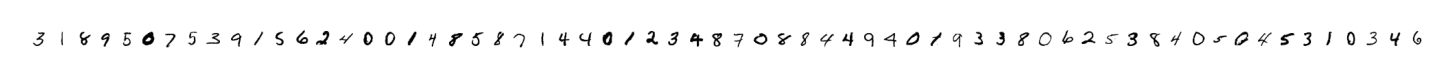

In [22]:
plt.rcParams['figure.dpi'] = 300
figure = plt.figure()
num_of_images = 64
for index in range(0, num_of_images):
    plt.subplot(1, 64, index + 1)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
print(f'Correct labels:{labels.tolist()}\nPred labels:{pred_labels}\nNumber of mistakes:{mistakes_count}')

## Save model

In [23]:
torch.save(convNumberRecognizer.state_dict(), 'models/ConvNumberRecognizer_params.pth')

## Load model

In [24]:
convNumberRecognizer.load_state_dict(torch.load('models/ConvNumberRecognizer_params.pth'))

<All keys matched successfully>

## Experiments

#### _Secondary functions_

In [25]:
def convert_logit_to_prediction(logit, labels):
    prob = torch.exp(logit)
    prob = list(prob.detach().numpy()[0])
    pred_label = prob.index(max(prob))
    return prob.index(max(prob))

def replace_pixel(image, in_range, out_color):
    for i in range(image.numpy().squeeze().shape[0]):
        for j in range(image.numpy().squeeze().shape[1]):
            if image.numpy()[0][i][j] > in_range:
                print(f'replaced pixel index:[{i}, {j}]')
                image.numpy()[0][i][j] = out_color
                return image
            
def add_row(image, out_color):
    row_index = randrange(28)
    for i in range(image.numpy().squeeze().shape[1]):
        image.numpy()[0][row_index][i] = out_color
    return image

def add_column(image, out_color):
    column_index = randrange(28)
    for i in range(image.numpy().squeeze().shape[1]):
        image.numpy()[0][i][column_index] = out_color
    return image

#### _Delete pixel(s) and noise_

In [26]:
dataiter = iter(test_data)
images, labels = dataiter.next()

Correct label:3
Multylayer NN:8
Single layer NN:8
Convolutioan NN:2


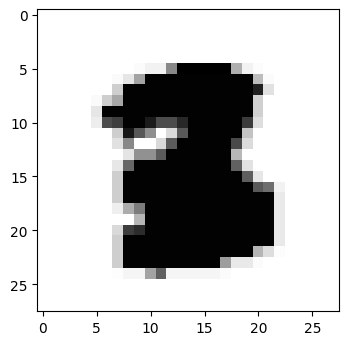

In [27]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(images[0].view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(images[0].size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(images[0].reshape(1, 1, 28, 28)), labels)}')

replaced pixel index:[5, 13]
Correct label:3
Multylayer NN:8
Single layer NN:8
Convolutioan NN:2


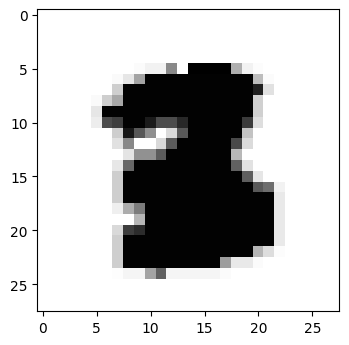

In [28]:
image = replace_pixel(images[0], 0.8, -1.0)
plt.imshow(image.numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(image.view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(image.size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(image.reshape(1, 1, 28, 28)), labels)}')

In [29]:
dataiter = iter(test_data)
images, labels = dataiter.next()

Correct label:3
Multylayer NN:3
Single layer NN:3
Convolutioan NN:3


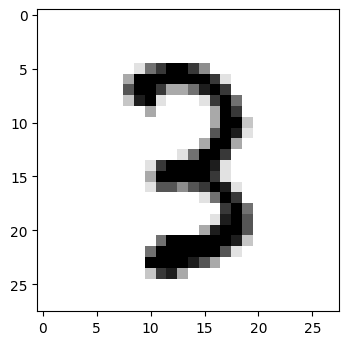

In [30]:
dataiter = iter(test_data)
images, labels = dataiter.next()

plt.rcParams['figure.dpi'] = 100
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(images[0].view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(images[0].size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(images[0].reshape(1, 1, 28, 28)), labels)}')

replaced pixel index:[5, 12]
replaced pixel index:[5, 13]
replaced pixel index:[6, 9]
replaced pixel index:[6, 10]
replaced pixel index:[6, 11]
replaced pixel index:[6, 12]
replaced pixel index:[6, 13]
replaced pixel index:[6, 14]
replaced pixel index:[6, 15]
replaced pixel index:[7, 9]
replaced pixel index:[7, 10]
replaced pixel index:[7, 16]
replaced pixel index:[8, 10]
replaced pixel index:[8, 17]
replaced pixel index:[9, 17]
replaced pixel index:[10, 17]
replaced pixel index:[10, 18]
replaced pixel index:[11, 17]
replaced pixel index:[12, 16]
replaced pixel index:[12, 17]
replaced pixel index:[13, 15]
replaced pixel index:[13, 16]
replaced pixel index:[14, 12]
replaced pixel index:[14, 13]
replaced pixel index:[14, 14]
replaced pixel index:[14, 15]
replaced pixel index:[15, 11]
replaced pixel index:[15, 12]
replaced pixel index:[15, 13]
replaced pixel index:[15, 14]
Correct label:3
Multylayer NN:3
Single layer NN:3
Convolutioan NN:3


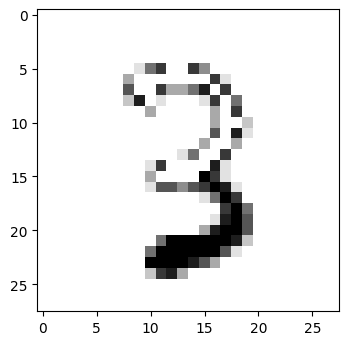

In [31]:
pixels_count = 30
for i in range(pixels_count):
    image = replace_pixel(images[0], 0.8, -1.0)
plt.imshow(image.numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(image.view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(image.size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(image.reshape(1, 1, 28, 28)), labels)}')

#### _Add a row or column_

In [32]:
dataiter = iter(test_data)
images, labels = dataiter.next()

Correct label:6
Multylayer NN:6
Single layer NN:6
Convolutioan NN:6


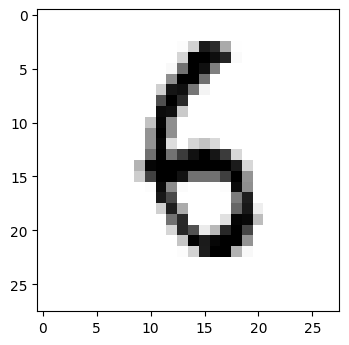

In [33]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(images[0].view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(images[0].size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(images[0].reshape(1, 1, 28, 28)), labels)}')

Correct label:6
Multylayer NN:6
Single layer NN:6
Convolutioan NN:6


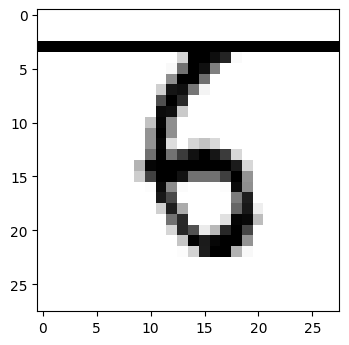

In [34]:
image = add_row(images[0], 1.0)
plt.imshow(image.numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(image.view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(image.size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(image.reshape(1, 1, 28, 28)), labels)}')

In [35]:
dataiter = iter(test_data)
images, labels = dataiter.next()

Correct label:4
Multylayer NN:4
Single layer NN:4
Convolutioan NN:4


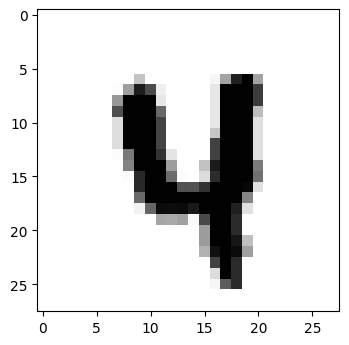

In [36]:
plt.rcParams['figure.dpi'] = 100
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(images[0].view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(images[0].size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(images[0].reshape(1, 1, 28, 28)), labels)}')

Correct label:4
Multylayer NN:4
Single layer NN:4
Convolutioan NN:4


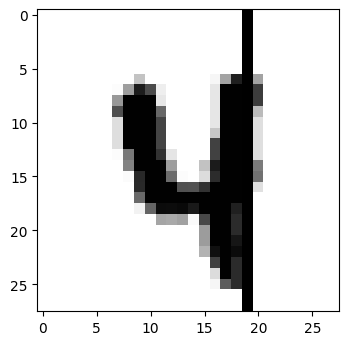

In [37]:
image = add_column(images[0], 1.0)
plt.imshow(image.numpy().squeeze(), cmap='gray_r')
print(f'Correct label:{labels[0].item()}\nMultylayer NN:{convert_logit_to_prediction(numberRecognizer(image.view(images[0].size(0), -1)), labels)}\nSingle layer NN:{convert_logit_to_prediction(linearClassifier(images[0].view(image.size(0), -1)), labels)}\nConvolutioan NN:{convert_logit_to_prediction(convNumberRecognizer(image.reshape(1, 1, 28, 28)), labels)}')